In [0]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2
import math
import numpy as np
np.set_printoptions(suppress=True)
from scipy import stats
from google.colab import drive
from google.colab.patches import cv2_imshow
import scipy.ndimage.filters as med
import time
np.set_printoptions(suppress=True)

In [2]:
drive.mount('/content/drive')
path_to_data = '/content/drive/My Drive/Colab Notebooks/Research/datasets/'
src = path_to_data + 'separated/'
dst = path_to_data + 'dataincsv/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def checkUp ( offset, img ):
  blankCount = 0

  row = offset
  while( row >= 0 ):
    if( len(set(img[row])) == 1 ):
      blankCount+=1
    if(blankCount >= 35):
      return row
    row-=1
  return 0

def checkDown ( offset, img ):
  blankCount = 0

  row = offset
  while( row < img.shape[0] ):
    if( len(set(img[row])) == 1 ):
      blankCount+=1
    if(blankCount >= 35):
      return row
    row+=1
  return img.shape[0]

In [0]:
def convertToValues ( imgName ):
  img = cv2.imread(imgName, 0)
  img2 = cv2.imread(imgName, 0)
  sobelY = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = -1)
  # cv2_imshow(sobelY)
  nRow, _ = img.shape
  gradientY, gradientX = np.where( sobelY == 255 )
  heightOffset = np.argmax(np.bincount(gradientY))
  top = checkUp(heightOffset, img)
  bottom = checkDown(heightOffset, img)
  img = img[top:bottom, 10 : -10]
  vals = []
  for col in range( img.shape[1] ):
    currentCol = img[:, col]
    signalVals = np.where( currentCol == 0 )
    if(signalVals[0].size != 0):
      signalVal = np.average( signalVals )
      vals.append( heightOffset - signalVal )
    else:
      vals.append(None)  
  return img2,vals

def convertToValues2 ( imgName ):
  img = cv2.imread(imgName, 0)
  sobelY = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = -1)
  # cv2_imshow(sobelY)
  nRow, _ = img.shape
  gradientY, gradientX = np.where( sobelY == 255 )
  heightOffset = np.argmax(np.bincount(gradientY))
  vals = []
  prevVal = heightOffset

  for col in range( img.shape[1] ):
    currentCol = img[:, col]
    signalVals = np.where( currentCol == 0 )
    if(signalVals[0].size == 0):
      signalVals = [prevVal]
    # charRemoval = []
    # for val in np.nditer(signalVals[0]):
    #   if( abs(val-heightOffset) > 60 and col < 100 ):
    #     charRemoval.append(prevVal)
    #   else:
    #     charRemoval.append(val)
    # signalVal = np.average(charRemoval)
    signalVal = np.average( signalVals )
    prevVal = signalVal
    vals.append( heightOffset - signalVal )
  errorCorrection = stats.mode(vals, axis = None)
  #print( errorCorrection[0] )
  
  return med.median_filter(vals-errorCorrection[0], size = (5))



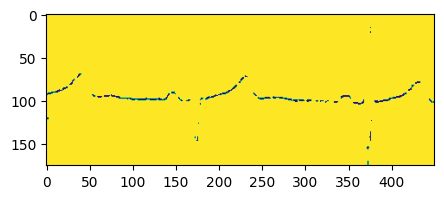

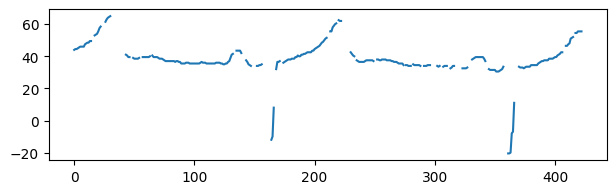

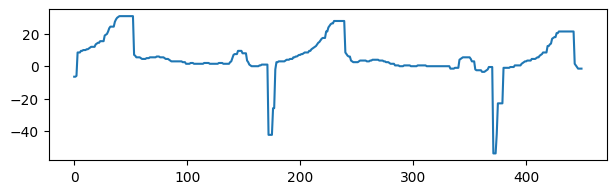

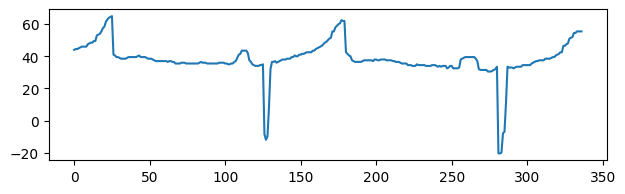

Converted Image: XC_37/XC_37_v4.png
[15, 16, 23, 24, 25, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 47, 48, 55, 56, 64, 133, 134, 140, 141, 142, 148, 149, 150, 151, 157, 158, 159, 160, 161, 163, 167, 172, 173, 211, 212, 219, 223, 224, 225, 226, 227, 228, 229, 234, 250, 251, 275, 281, 289, 290, 297, 298, 299, 300, 301, 305, 306, 311, 312, 317, 318, 319, 320, 321, 322, 328, 329, 330, 343, 344, 358, 359, 360, 367, 368, 369, 407, 408, 416, 423, 424, 425, 426, 427, 428, 429]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,

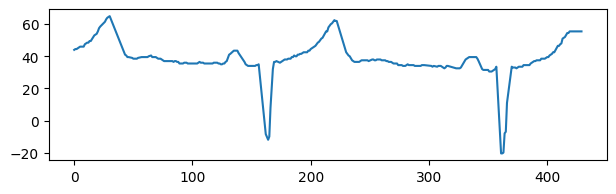

In [168]:
sport = "XC"
number = "37"
version = "v4"
s = 7.2
imgName = sport +'_'+number+'/'+sport+'_'+number+'_'+version+'.png'
img,vals = convertToValues(src+imgName)
figure(num=None, figsize=(s, 2), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()
# print(vals)

figure(num=None, figsize=(s, 2), dpi=100, facecolor='w', edgecolor='k')
plt.plot(vals)
plt.show()


figure(num=None, figsize=(s, 2), dpi=100, facecolor='w', edgecolor='k')
vals2 = convertToValues2(src+imgName)
plt.plot(vals2)
plt.show()


valss = [i for i in vals if i is not None]
figure(num=None, figsize=(s, 2), dpi=100, facecolor='w', edgecolor='k')
plt.plot(valss)
plt.show()


print( "Converted Image: "+ imgName)
x = [i for i in range(len(vals)) if vals[i] == None]
print(x)
allX = [i for i in range(len(vals)) ]
print(allX)
fp = [i for i in vals if i is not None]
print(fp)
xp = [i for i in allX if i not in x]
print(xp)
interp = np.interp(x, xp, fp)
# print(interp)
vals = [i for i in vals if i is not None]
for i in range( len(x) ):
  vals.insert(x[i], interp[i])
figure(num=None, figsize=(s, 2), dpi=100, facecolor='w', edgecolor='k')
plt.plot(vals)
plt.show()
# print(vals)

In [75]:
x = [i for i in range(len(vals)) if vals[i] == None]
print(x)

[15, 16, 17, 22, 23, 27, 31, 32, 39, 40, 70, 71, 72, 85, 86, 87, 93, 94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 117, 118, 125, 126, 149, 150, 151, 152, 157, 158, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 179, 180, 187, 188, 194, 195, 196, 202, 203, 204, 205, 210, 211, 220, 225, 226, 227, 228, 234, 257, 258, 265, 266, 267, 273, 274, 304, 305, 306, 311, 312, 324, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 341, 342, 343, 344, 368, 369, 374, 375, 376, 377, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 421, 422, 423, 430, 437, 438, 439, 442, 443, 444, 445, 446]


In [77]:

print(allX)

print(xp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [79]:

print(fp)

[-10.333333333333329, -10.666666666666671, -7.5, -8.0, -12.666666666666671, -11.599999999999994, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 1.5, 2.0, 1.5, 1.5, 2.0, 1.0, 1.5, 2.0, 2.5, 1.5, 1.5, 2.0, 2.0, 1.5, 1.5, 2.0, 1.5, 3.0, 2.0, 1.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.5, 1.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 4.0, 4.5, 4.5, 4.5, 4.0, 1.5, 1.5, 1.0, 0.5, 0.5, 11.5, 11.0, 10.5, 10.0, 5.0, 4.5, 4.5, 3.5, 3.5, 3.0, 4.0, 4.0, 4.5, 4.0, 4.0, 4.5, 6.0, 6.5, 7.0, 7.5, 8.5, 9.5, 9.5, 9.5, 10.5, 11.5, 12.0, 13.0, 15.0, 16.0, 18.5, 19.0, 32.5, 33.5, 36.0, 37.5, 41.5, 41.5, 38.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.0, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.0, 2.5, 3.0, 2.5, 2.5, 2.5, 2.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 1.5, 1.0, 1.0, 1.5, 2.0, 1.5, 1.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, -0.5, -0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 1.

In [0]:

print

In [0]:
# folders = os.listdir(src)
# for folder in folders:
#   files = os.listdir(src + folder)
#   os.mkdir(dst+folder)
#   for _file in files:
#     # time.sleep(1)
#     try:
#       _val = convertToValues(src+folder+'/'+_file).reshape((1,-1))
#       np.savetxt(dst+folder+'/'+_file.split('.')[0]+'.csv', _val.reshape((1,-1)), delimiter=",", fmt="%s")
#     except:
#       print("An exception occurred at: "+ dst+folder+"/"+_file.split('.')[0]+".csv")
    
#   print("Saved "+ dst+folder )

In [0]:
def foo(imgName):
  img = cv2.imread( src +imgName, 0)
  vals = convertToValues(img)
  # print( "Original Image: "+ imgName )
  # figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
  figure(num=None, figsize=(15, 2), dpi=100, facecolor='w', edgecolor='k')
  # plt.axis([0, 2200, 0, 200])
  plt.axis([0, 2050, 200, 0])
  plt.imshow(img)
  plt.show()
  print( "Converted Image: "+ imgName)
  # plt.axis([0, 400, -100, 100])
  # if( i == 13 ):
  # 
  vals = med.median_filter(vals, size = (3))
  figure(num=None, figsize=(15, 2), dpi=100, facecolor='w', edgecolor='k')
  plt.axis([0, 2050, -100, 100])
  plt.plot(vals)
  plt.show()
  print(vals)

In [0]:
print(len(os.listdir(dst)))

736


In [0]:
sport = "Crew"
number = "90"
version = "v5"

imgName = sport +'_'+number+'/'+sport+'_'+number+'_'+version+'.png'
img = cv2.imread(src+imgName, 0)
sobelY = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = -1)
# cv2_imshow(sobelY)
nRow, _ = img.shape
gradientY, gradientX = np.where( sobelY == 255 )
heightOffset = np.argmax(np.bincount(gradientY))

vals = []
for col in range( img.shape[1] ):
  currentCol = img[:, col]
  signalVals = np.where( currentCol == 0 )
  if(signalVals[0].size != 0):
    signalVal = np.average( signalVals )
    vals.append( heightOffset - signalVal )
  else:
    vals.append(None)  


In [125]:
print(heightOffset)

94


In [126]:
img.shape

(175, 450)

In [138]:
checkUp( 94 )
checkDown( 94 )

147

In [162]:
type(vals)

list

In [0]:
_val = np.array(vals)

In [0]:
np.savetxt(dst+'demo.csv', _val.reshape((1,-1)), delimiter=",", fmt="%s")